In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Create a dataset
data = {
    "years_experience": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "salary": [35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
}

df = pd.DataFrame(data)
df


,years_experience,salary
0,1,35
1,2,40
2,3,45
3,4,50
4,5,55
5,6,60
6,7,65
7,8,70
8,9,75
9,10,80


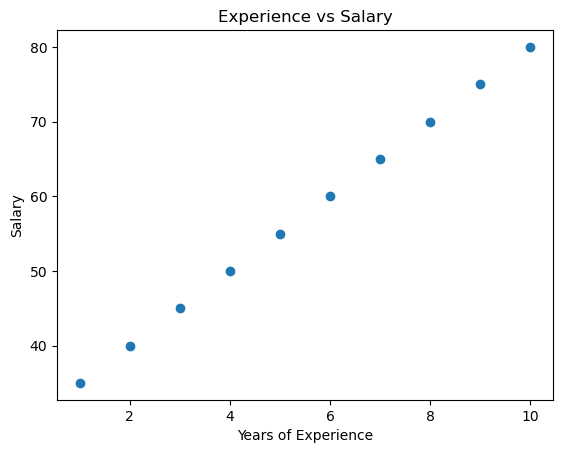

In [35]:
plt.scatter(df["years_experience"], df["salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()


In [39]:
X = df[["years_experience"]]  # must be 2D
y = df["salary"]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [43]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [45]:
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])


Intercept (β0): 29.999999999999996
Slope (β1): 5.000000000000001


In [47]:
y_pred = model.predict(X_test)

# Compare actual vs predicted
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

comparison


,Actual,Predicted
0,75,75.0
1,40,40.0


In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.0
R² Score: 1.0


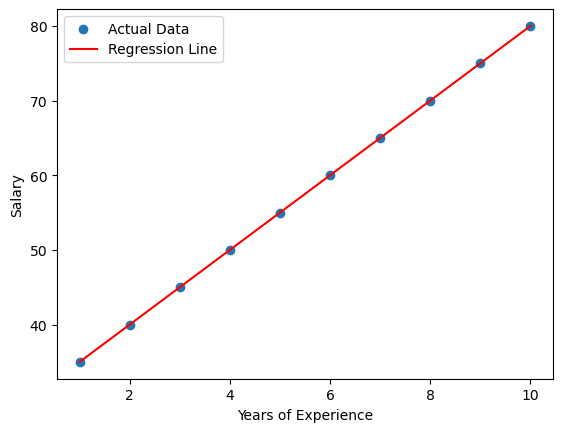

In [51]:
plt.scatter(X, y, label="Actual Data")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()


In [53]:
# Predict salary for someone with 12 years experience
model.predict([[12]])


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([90.])

In [55]:
# Add another feature
df["education_level"] = [1,1,2,2,2,3,3,3,4,4]  # ordinal example

X = df[["years_experience", "education_level"]]
y = df["salary"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 29.999999999999982
Coefficients: [5.00000000e+00 1.08521062e-15]
